## Kepler's Laws of Planetary Motion

The period $P$ of a planet moving on an elliptical orbit around a star reads 

$$
P^2 = \frac{4\pi^2}{G(M+m)}a^3
$$

where $a$ is the semi-major axis of the orbit, $M$ is the mass of the star, $m$ is the mass of the planet, and $G$ is the gravitational constant.

In [ ]:
import math
import numpy as np 
from scipy.constants import year,hour,au,G
from astropy.constants import M_sun

M = M_sun.value

# orbital parameters of planets
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/

m = 1e24 * np.array([
    0.33011, 4.8675, 5.9723, 0.64171,
    1898.19, 568.34, 86.813, 102.413,
])

a = 1e9 * np.array([
    57.9, 108.21, 149.60, 227.92,
    778.57, 1433.53, 2872.46, 4495.06,
])

T_test_mass = 2*math.pi * (G*M)**(-1/2) * a**(3/2)
T_two_body = 2*math.pi * (G*(M+m))**(-1/2) * a**(3/2)

print("T [yr] dev [hr] dev rel.")
for val1, val2 in zip(T_test_mass, T_two_body):
    dev = val1 - val2
    if dev > hour:
        line = "{0:6.2f} {1:<7.1f} {2:.1e}"
    else:
        line = "{0:6.2f} {1:7.4f} {2:.1e}"
    print(line.format(val2/year, dev/hour, dev/val1))

T [yr] dev [hr] dev rel.
  0.24  0.0002 8.3e-08
  0.62  0.0066 1.2e-06
  1.00  0.0132 1.5e-06
  1.88  0.0027 1.6e-07
 11.88 49.6    4.8e-04
 29.68 37.2    1.4e-04
 84.20 16.1    2.2e-05
164.82 37.2    2.6e-05


Power laws, such as $P \propto a^{2/3}$, appear as straight lines with slope equal to the exponent in a double-logarithmic diagram:

$$
\log P = \frac{2}{3}\log a + \text{const}
$$

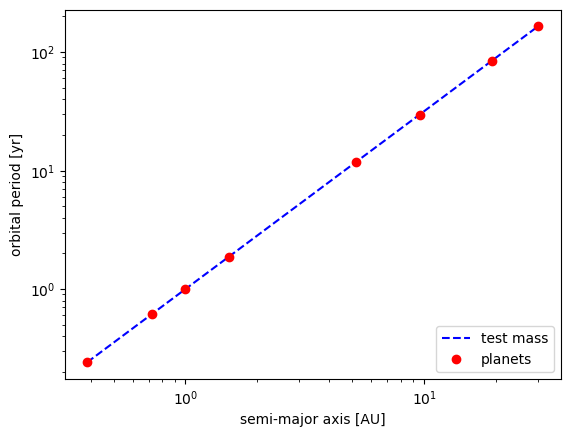

In [ ]:
import matplotlib.pyplot as plt

plt.loglog(a/au, T_test_mass/year, 'blue', linestyle='--',
           label='test mass')
plt.loglog(a/au, T_two_body/year, 'ro', label='planets')
plt.legend(loc='lower right')
plt.xlabel("semi-major axis [AU]")
plt.ylabel("orbital period [yr]")
plt.savefig("kepler_third_law.pdf")